In [91]:
%autosave 60

Autosaving every 60 seconds


# Домашнее задание EDA | МТС Тета
-----
- Нужно провести EDA любого датасета на ваше усмотрение в специально подготовленном ipynb
- В этом ноутбуке будут блоки под разные типы графиков
- Нужно выбрать такой датасет, который позволит построить каждый из этих графиков корректно
- В ноутбуке так же будет дополнительное поле для графика на ваш выбор. В нем должен быть график, который не был построен ранее в ноутбуке (другой тип графика)
- Ноутбук должен отбегать в режиме run all, а так же сохранять все изображения шаблонным образом, как заложено в ноутбуке
- Для каждого графика должны быть написаны выводы
- __Вместе с ноутбуком нужно сдать сохраненные изображения (проверьте корректность их сохранения перед отправкой ДЗ)__
- изображения должны быть в формате png или jpeg. Не сохраняйте изображения в html (так делает plotly)
____
**Критерии оценки**
- Вы построили все основные графики без критических ошибок – 8 баллов
- Вы выполнили пункт 1, а так же построили дополнительный график - 10 баллов
- Доп. баллы выставляются за победу в tinder игре – подробности будут позже. Но чтобы в ней победить, ваш график должен оказаться самым красивым. 
- Доп. Баллы получат топ 10 человек итогового рейтинга. 
---
- Максимум 10 баллов (и +5 дополнительных)
- 1-4 балла: незачет
- 5-6 баллов: 3, незачет
- 7-8 баллов: 4, зачет
- 9-10 баллов: 5, зачет

## подготовка

In [92]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import mplcyberpunk

plt.style.use("cyberpunk")

In [93]:
# подставьте ваше имя и фамилию в эту переменную как в примере, (например Максим_Шаланкин)
image_name_prefix = 'Артемий_Галкин'

# можно поменять, а можно оставить - сюда будут сохраняться изображения
path_to_save_images = 'images'

In [94]:
os.makedirs(path_to_save_images, exist_ok=True)

In [95]:
data = pd.read_csv(r"C:\beautiful EDA\car_price_dataset.csv")
data.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [96]:
data.info() #данные чистые, без пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [97]:
data.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [98]:
data["Brand"].unique()

array(['Kia', 'Chevrolet', 'Mercedes', 'Audi', 'Volkswagen', 'Toyota',
       'Honda', 'BMW', 'Hyundai', 'Ford'], dtype=object)

In [99]:
data[data["Brand"] == "Mercedes"]["Model"].unique()

array(['GLA', 'E-Class', 'C-Class'], dtype=object)

In [100]:
data[data["Brand"] == "BMW"]["Model"].unique()

array(['5 Series', '3 Series', 'X5'], dtype=object)

## (1) line plot

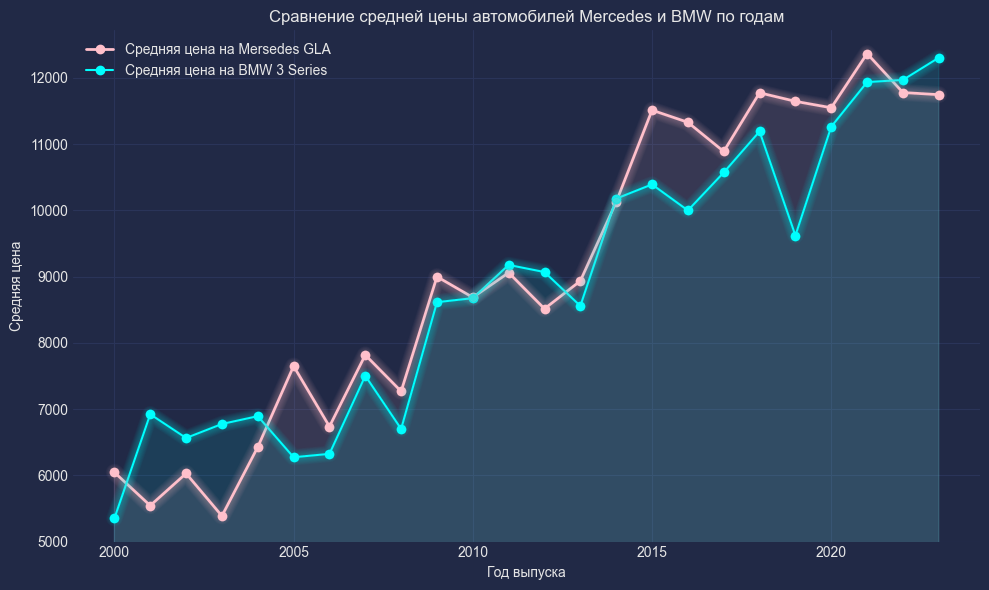

In [101]:
data_mersedes = data[(data["Brand"] == "Mercedes") & (data["Model"] == "GLA")]
data_bmw = data[(data["Brand"] == "BMW") & (data["Model"] == "3 Series")]
avg_price_mersedes_by_year = data_mersedes.groupby("Year")["Price"].mean().reset_index()
avg_price_bmw_by_year = data_bmw.groupby("Year")["Price"].mean().reset_index()
avg_price_mersedes_by_year = avg_price_mersedes_by_year.sort_values('Year')
avg_price_bmw_by_year = avg_price_bmw_by_year.sort_values('Year')
plt.figure(figsize=(10, 6))
plt.plot(avg_price_mersedes_by_year['Year'], avg_price_mersedes_by_year['Price'], marker='o', linestyle='-', color='pink', linewidth=2, label='Средняя цена на Mersedes GLA')
plt.plot(avg_price_bmw_by_year['Year'], avg_price_bmw_by_year['Price'], marker='o', linestyle='-', color='cyan', label='Средняя цена на BMW 3 Series')
plt.xlabel('Год выпуска')
plt.ylabel('Средняя цена')
plt.title('Сравнение средней цены автомобилей Mercedes и BMW по годам')
plt.legend()
plt.grid(True)
mplcyberpunk.add_glow_effects()
plt.tight_layout()
plt.savefig(
    os.path.join(path_to_save_images, f'{image_name_prefix}_image_1.png')
)
plt.show()


#### выводы (1):
Средняя цена как на Mercedes GLA, так и на BMW 3 Series увеличивается с годами, что может быть связано с инфляцией, улучшением технологий и ростом спроса. В начале периода (2000-2010) цены колебались, но с 2010 года наблюдается устойчивый рост. Разрыв в ценах увеличивается в последние годы, что может указывать на разную ценовую стратегию брендов.

## (2) (bar plot или stacked bar plot)

In [102]:
data["Model"].unique()

array(['Rio', 'Malibu', 'GLA', 'Q5', 'Golf', 'Camry', 'Civic', 'Sportage',
       'RAV4', '5 Series', 'CR-V', 'Elantra', 'Tiguan', 'Equinox',
       'Explorer', 'A3', '3 Series', 'Tucson', 'Passat', 'Impala',
       'Corolla', 'Optima', 'Fiesta', 'A4', 'Focus', 'E-Class', 'Sonata',
       'C-Class', 'X5', 'Accord'], dtype=object)

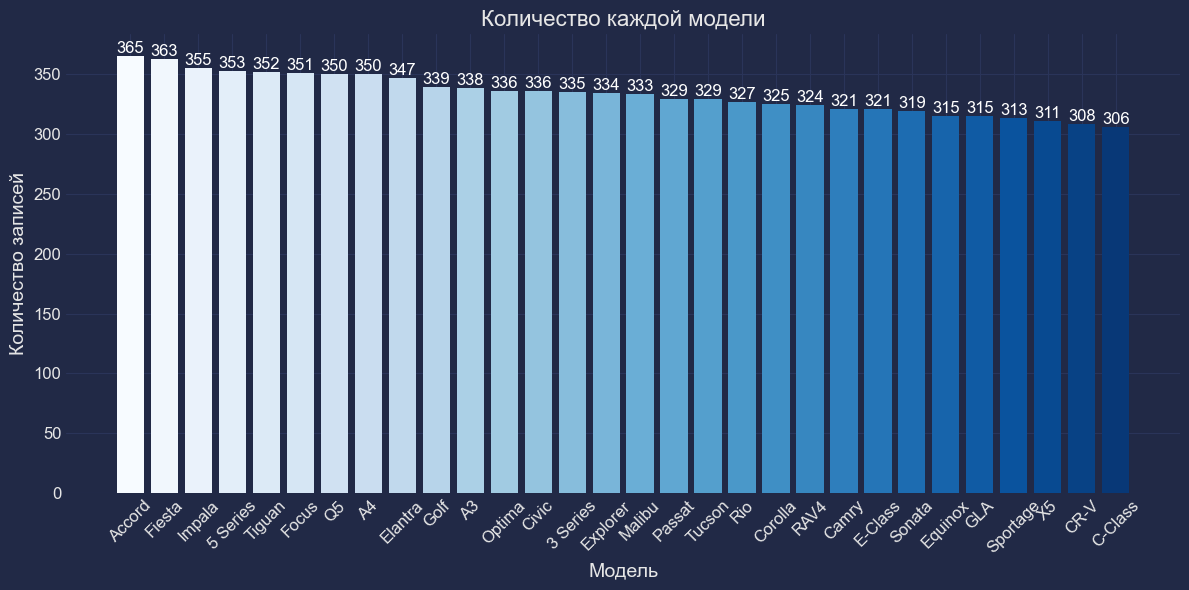

In [103]:
model_counts = data["Model"].value_counts()
categories = model_counts.index.tolist()
values = model_counts.values
cmap = plt.get_cmap('Blues')
norm = plt.Normalize(0, len(categories))
colors = [cmap(norm(i)) for i in range(len(categories))]
plt.figure(figsize=(12, 6))
bars = plt.bar(categories, values, color=colors, zorder=2)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height,                            
        f'{int(height)}',                 
        ha='center',                     
        va='bottom',                      
        fontsize=12,                       
        color='white'                      
    )
plt.title('Количество каждой модели', fontsize=16)
plt.xlabel('Модель', fontsize=14)
plt.ylabel('Количество записей', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(
    os.path.join(path_to_save_images, f'{image_name_prefix}_image_2.png')
)

plt.show()

#### выводы (2):
Разница между самой популярной моделью (365 записей) и менее популярными моделями (около 306 записей) незначительна. Это говорит о сбалансированной выборке, где нет явного доминирования одной марки или модели. Ford (Fiesta, Focus, Explorer), Honda (Accord, Civic, CR-V), Toyota (Corolla, Camry, RAV4) и Volkswagen (Tiguan, Golf, Passat) – марки, которые чаще всего встречаются в этой выборке. Это отражает их популярность на рынке автомобилей. Этот график демонстрирует равномерное распределение популярных моделей автомобилей без явного доминирования одной марки. Он также показывает баланс между седанами и кроссоверами, что соответствует рыночным тенденциям спроса.

##  (3) (hist plot или pair plot или kde plot)

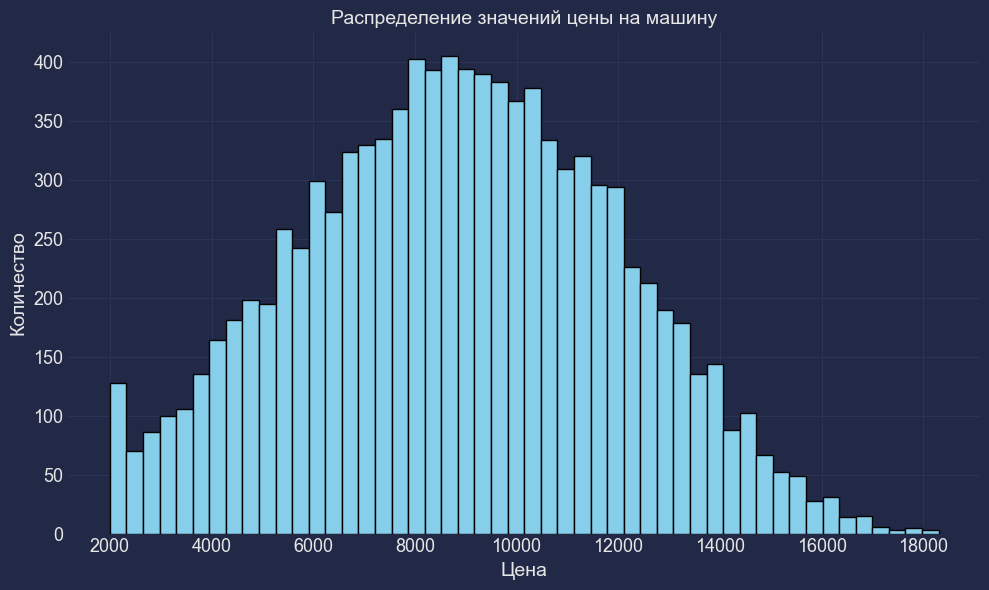

In [104]:
plt.figure(figsize=(10, 6))
plt.hist(data["Price"], bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Цена", fontsize=14)
plt.ylabel("Количество", fontsize=14)
plt.title("Распределение значений цены на машину", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.grid(True)
plt.tight_layout()
plt.savefig(
    os.path.join(path_to_save_images, f'{image_name_prefix}_image_3.png')
)
plt.show()

#### выводы (3):
Гистограмма показывает распределение близкое к нормальному. Это говорит о том, что большинство автомобилей сосредоточено в среднем ценовом диапазоне. Кроме этого мы видим, что дорогих автомобилей (которые больше 16к+) гораздо меньше дешевых. На последок можно сказать, что больше автомобилей, которые стоят 2 тысячи, чем остальных, которые в предели 4 тысяч.

##  (4) heatmap plot

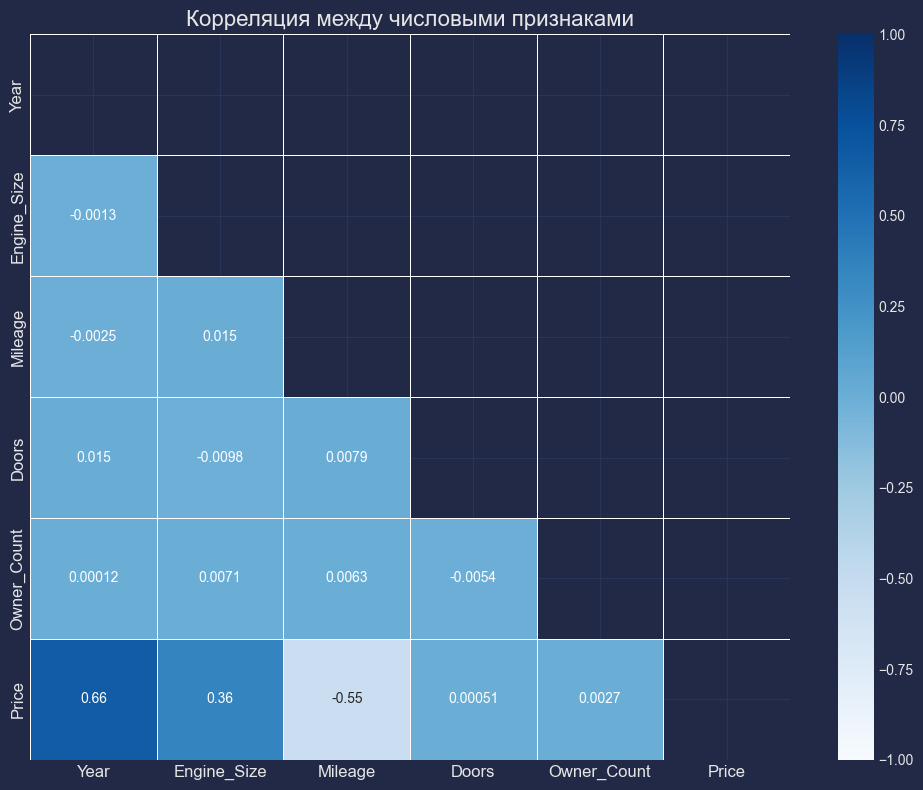

In [105]:
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='Blues', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Корреляция между числовыми признаками", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(
    os.path.join(path_to_save_images, f'{image_name_prefix}_image_4.png')
)
plt.show()

#### выводы (4):
Год выпуска и цена имеют положительную корреляцию (0.66). Это означает, что чем новее автомобиль, тем выше его цена, что логичном. Размер двигателя также влияет на стоимость автомобиля. Также можем заметить, что чем больше пробег тем дешевле цена, этот вывод мы сделали из-за того, что пробег и цена имеют отрицательную корреляцию (-0.55). У остальных фичей нулевая корреляция, это значит, что они практически не влияют друг на друга.

In [106]:
data.columns

Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Owner_Count', 'Price'],
      dtype='object')

##  (5) plot  на ваш выбор

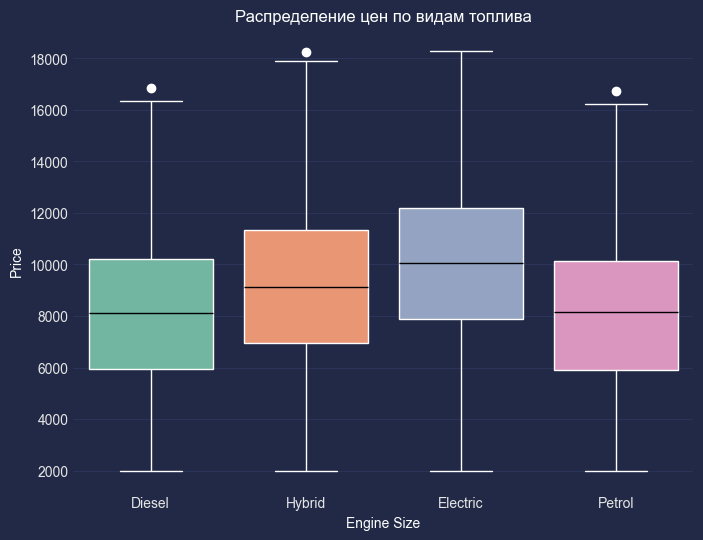

In [107]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Fuel_Type', y='Price', data=data, hue='Fuel_Type', palette='Set2',
    boxprops={'edgecolor': 'white'},  
    whiskerprops={'color': 'white'},  
    capprops={'color': 'white'},       
    medianprops={'color': 'black'},   
    flierprops={'marker': 'o', 'markerfacecolor': 'white', 'markeredgecolor': 'white'} 
)

plt.title('Распределение цен по видам топлива', color='white')
plt.xlabel('Engine Size', color='white')
plt.ylabel('Price', color='white')
plt.savefig(
    os.path.join(path_to_save_images, f'{image_name_prefix}_image_5.png')
)
plt.show()


#### выводы (5):
Электромобили (Electric) и гибриды (Hybrid) имеют более высокие медианные цены по сравнению с бензиновыми (Petrol) и дизельными (Diesel) авто. Электромобили (Electric) имеют самый широкий диапазон цен, что может говорить о наличии как доступных, так и премиальных моделей. В любом случае самыми доступными автомоболями являются на бензиновом и дизельном двигателях. 

# Итоговый вывод по всему датасету (по всему EDA)
Динамика цен автомобилей по годам 

· Средняя цена как Mercedes GLA, так и BMW 3 Series постоянно растет с годами

· В последние годы Mercedes GLA стал дороже BMW 3 Series, что может быть связано с премиальным позиционированием бренда

Популярность моделей автомобилей

· Самая популярная модель в датасете – Honda Accord, а за ней следуют Ford Fiesta и Chevrolet Impala

· Наиболее популярны седаны и кроссоверы, что подтверждает тренд рынка

Распределение цен на автомобили

· Цена большинства автомобилей находится в диапазоне 7 000 – 11 000

· Гистограмма имеет форму нормального распределения, что говорит о сбалансированности выборки

· Есть небольшой всплеск дешевых автомобилей (до 3000), что может быть связано с наличием бюджетных моделей

Корреляция между характеристиками автомобилей

· Цена и год выпуска (0.66) → Чем новее авто, тем оно дороже

· Цена и объем двигателя (0.36) → Чем больше двигатель, тем выше цена

· Цена и пробег (-0.55) → Чем выше пробег, тем дешевле автомобиль

· Остальные факторы не влияют друг на друга

Влияние типа топлива на цену

· Электромобили и гибриды в среднем дороже дизельных и бензиновых машин

· Наибольший разброс цен у электромобилей, что может говорить о наличии как бюджетных, так и премиальных моделей

In [108]:
print('well done!')

well done!
